In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
spotify_data = pd.read_csv('spotify_data_dictionary.csv')
spotify_data

,Field,Description
0,spotify_track_uri,Spotify URI that uniquely identifies each trac...
1,ts,Timestamp indicating when the track stopped pl...
2,platform,Platform used when streaming the track
3,ms_played,Number of milliseconds the stream was played
4,track_name,Name of the track
5,artist_name,Name of the artist
6,album_name,Name of the album
7,reason_start,Why the track started
8,reason_end,Why the track ended
9,shuffle,TRUE or FALSE depending on if shuffle mode was...


In [4]:
df = pd.read_csv("spotify_history.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
df.isna().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [6]:
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [7]:
df[df['reason_start'].isna() | df['reason_end'].isna()]


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
577,0Cng3O0fIHllQx3S78RvmL,2015-08-12 02:26:11,iOS,283466,From Eden,Hozier,Hozier,NaN,trackdone,False,False
596,4VSg5K1hnbmIg4PwRdY6wV,2015-08-12 05:03:15,iOS,40681,Shades Of Cool,Lana Del Rey,Ultraviolence,trackdone,NaN,False,True
597,1NA2NvAgCB4EfcBC8OHfuj,2015-08-12 05:07:44,iOS,268173,Staying Up,The Neighbourhood,I Love You.,NaN,trackdone,False,False
605,2YuyaXVPEDnuO3cFuQ3BTW,2015-08-12 05:23:23,iOS,41145,El Karma,Noel Torres,La Balanza,trackdone,NaN,False,True
606,4YfMIrgiCbzo4td18hwwvA,2015-08-12 05:24:10,iOS,46997,Tentándome,Juan Magán,The King Is Back,NaN,endplay,False,True
...,...,...,...,...,...,...,...,...,...,...,...
10088,5cgL1YdlGWR5KfncpAGFQk,2017-01-06 19:14:00,iOS,253866,Custard Pie - 1990 Remaster,Led Zeppelin,Physical Graffiti,NaN,trackdone,False,False
11368,24NwBd5vZ2CK8VOQVnqdxr,2017-01-14 02:45:35,iOS,168344,Sweet Emotion,Aerosmith,Toys In The Attic,trackdone,NaN,True,True
11369,4wMR4fRKMTyUJG6VAsmccv,2017-01-14 02:45:58,iOS,0,Riot Van,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",NaN,fwdbtn,False,True
24557,4gDyoe1FImDlXVt58ssnMf,2017-08-21 16:53:00,iOS,85495,All I Can Think About Is You,Coldplay,All I Can Think About Is You,NaN,NaN,False,True


In [8]:
df["reason_start"] = df["reason_start"].fillna("unknown")
df["reason_end"] = df["reason_end"].fillna("unknown")
df.isna().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

(np.float64(-1.099999955180237),
 np.float64(1.100000022372368),
 np.float64(-1.0999999740951585),
 np.float64(1.0999999987664362))

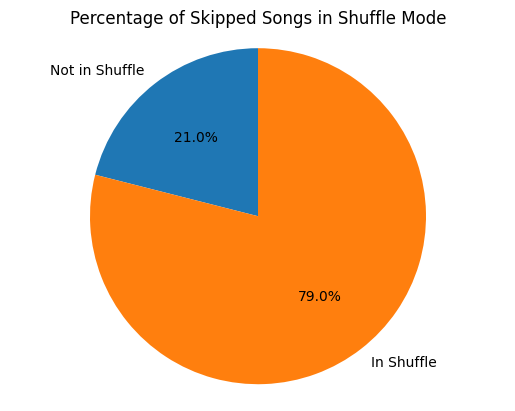

In [ ]:
# measure skip rates when shuffle is on
# does users skip songs more when in shuffle?

shuffle = df.groupby(["shuffle"])["skipped"].sum().reset_index()

labels = ['Not in Shuffle', 'In Shuffle']
sizes = shuffle["skipped"].values  

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Skipped Songs in Shuffle Mode")
plt.axis('equal')  

C:\Users\John Rey\AppData\Local\Temp\ipykernel_1864\1667364750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="reason_start", y="ms_played", data=duration_reason, palette="muted")


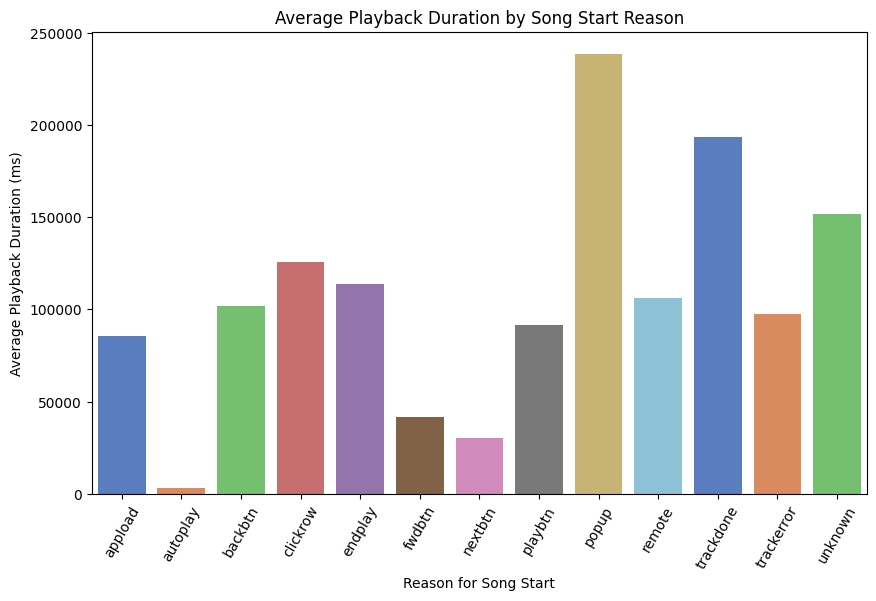

In [ ]:
# How does playback duration vary depending on how the song started?
# users tend to stay and listen more when songs are started thorugh popup
duration_reason = df.groupby("reason_start")["ms_played"].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x="reason_start", y="ms_played", data=duration_reason, palette="muted")
plt.title("Average Playback Duration by Song Start Reason")
plt.xlabel("Reason for Song Start")
plt.xticks(rotation=60)
plt.ylabel("Average Playback Duration (ms)")
plt.show()

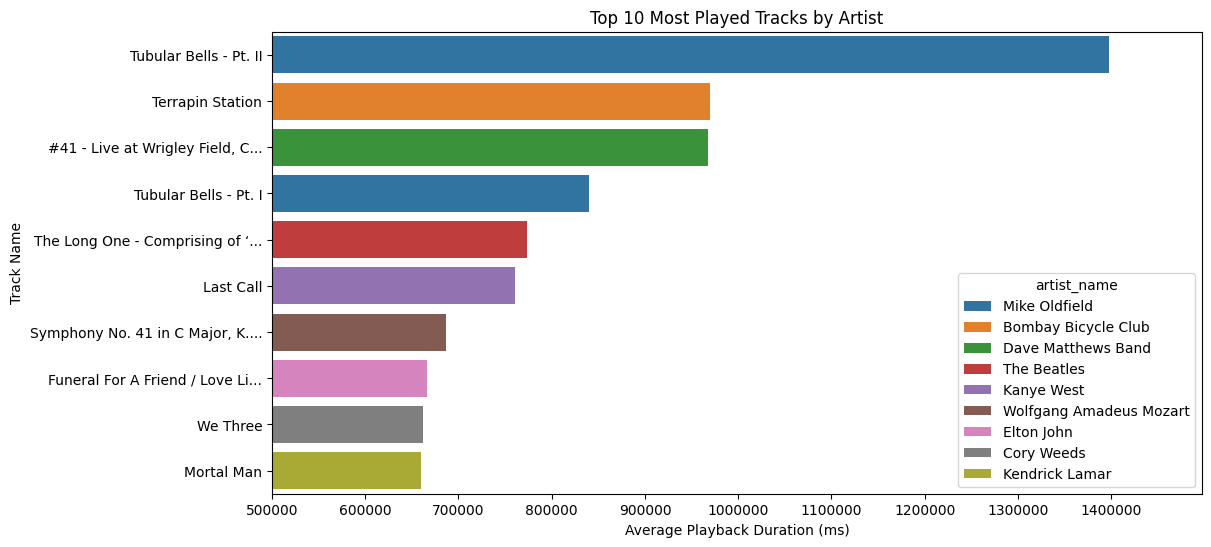

In [ ]:
# what are the top 10 most played tracks? (of any artist)

top_track = df.groupby(["track_name", "artist_name"])["ms_played"].mean().reset_index().sort_values("ms_played", ascending=False).head(10)

# Function to shorten track names and add ellipses
def shorten_track_name(name, max_length=30):
    if len(name) > max_length:
        return name[:max_length] + "..."
    return name

# Apply the shortening function to the 'track_name' column
top_track['short_track_name'] = top_track['track_name'].apply(shorten_track_name)

# Create the bar plot with shortened track names
plt.figure(figsize=(12, 6))
sns.barplot(x="ms_played", y="short_track_name", data=top_track, hue="artist_name", dodge=False)
plt.title("Top 10 Most Played Tracks by Artist")
plt.xlabel("Average Playback Duration (ms)")
plt.ylabel("Track Name")

# Customizing the x-axis to show whole numbers
plt.xlim(500000, top_track["ms_played"].max() + 100000)  # Setting the range from 500000 to max ms_played + 100000
plt.xticks(ticks=range(500000, int(top_track["ms_played"].max()) + 100000, 100000))  # Setting tick intervals of 100000

# Disable scientific notation and force whole numbers
plt.ticklabel_format(style='plain', axis='x')

plt.show()


C:\Users\John Rey\AppData\Local\Temp\ipykernel_1864\1066678371.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="artist_name", y="ms_played", data=most_listened_album_per_artist, palette="viridis")


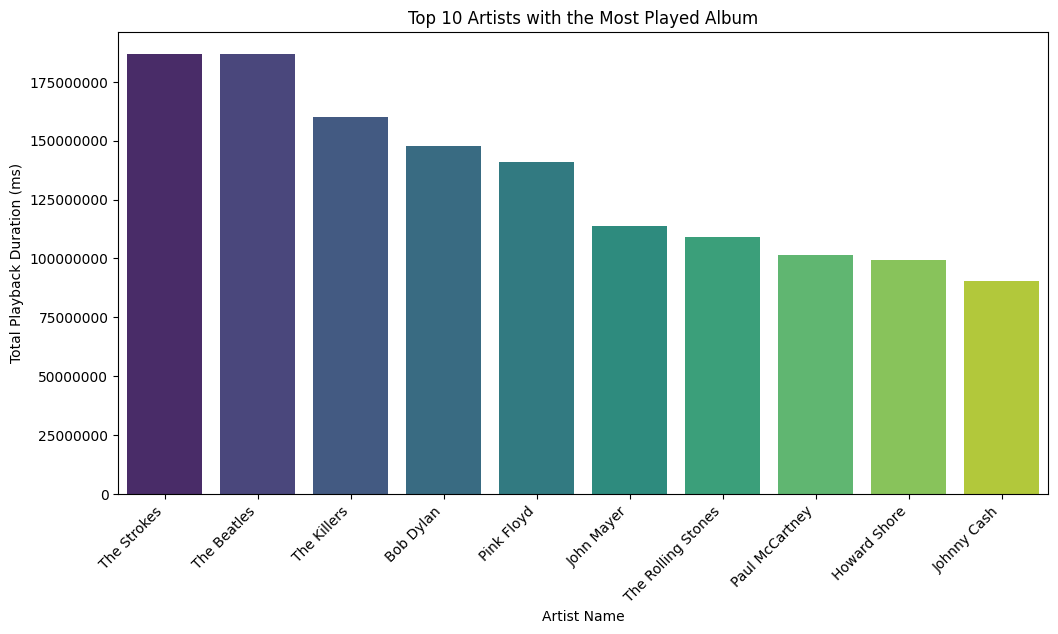

In [72]:
# which 10 artist has the most played album?
album_artist = df.groupby(["artist_name", "album_name"])["ms_played"].sum().reset_index()
most_listened_album_per_artist = album_artist.loc[album_artist.groupby("artist_name")["ms_played"].idxmax()].sort_values("ms_played", ascending=False).head(10)

most_listened_album_per_artist

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="artist_name", y="ms_played", data=most_listened_album_per_artist, palette="viridis")

# Title and labels
plt.title("Top 10 Artists with the Most Played Album")
plt.xlabel("Artist Name")
plt.ylabel("Total Playback Duration (ms)")

# Customizing the x-axis to show whole numbers
plt.xticks(rotation=45, ha="right")  # Rotating artist names for readability

# Customizing y-axis to avoid scientific notation and force whole numbers
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

In [44]:
top_track[top_track.index == 12374]

,track_name,artist_name,ms_played
12374,The Long One - Comprising of ‘You Never Give M...,The Beatles,773678.0
